In [25]:
!pip install --quiet climetlab tensorflow

# Machine learning example

In [27]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Sequential

In [29]:
import climetlab as cml

### Load the high-low data set and plot all the fields and their label

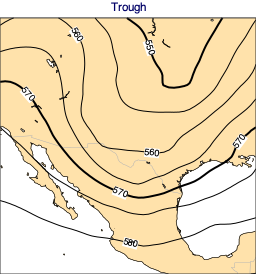

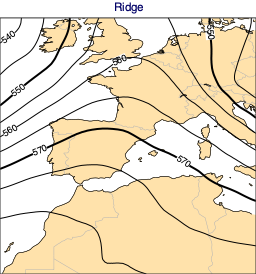

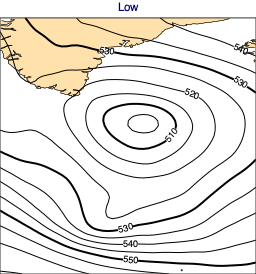

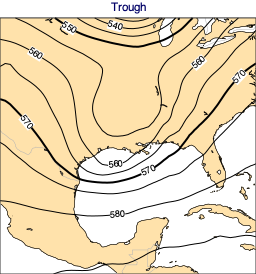

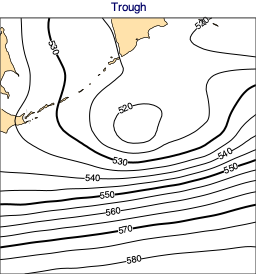

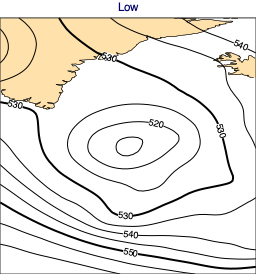

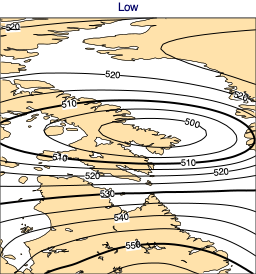

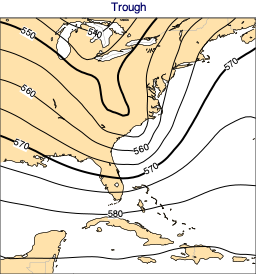

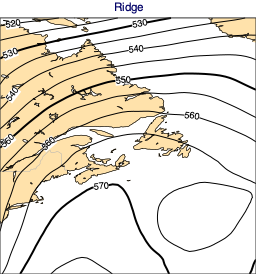

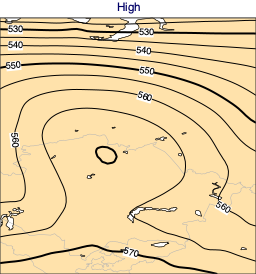

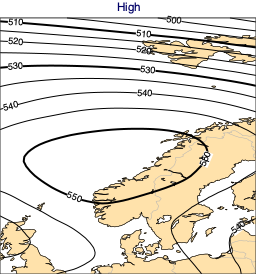

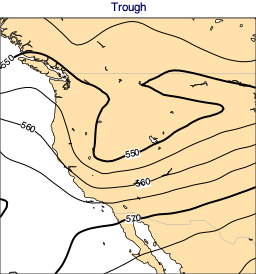

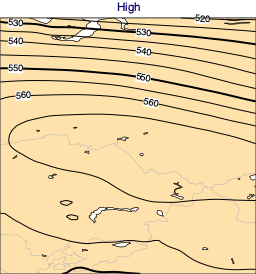

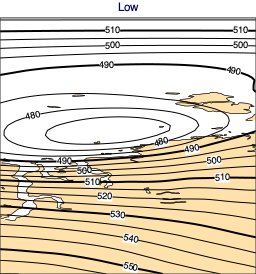

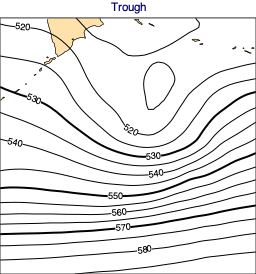

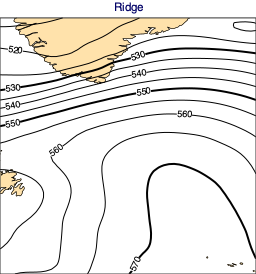

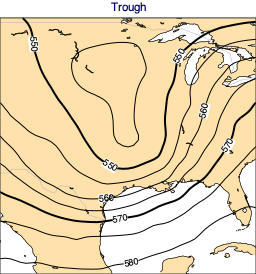

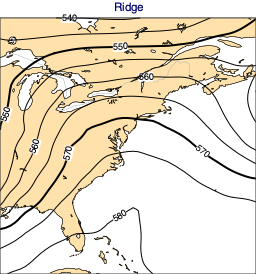

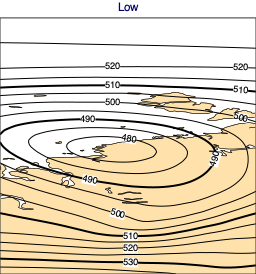

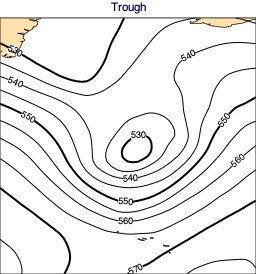

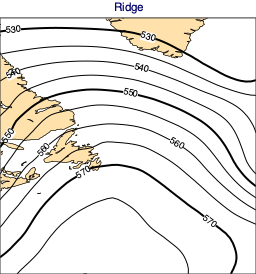

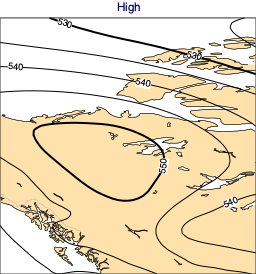

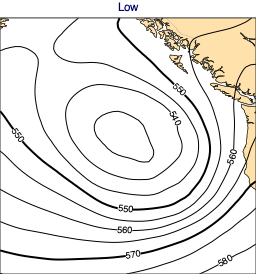

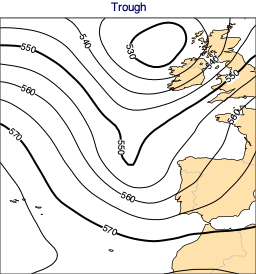

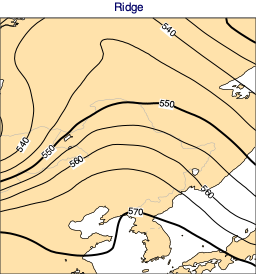

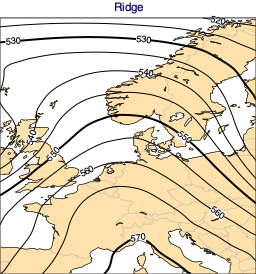

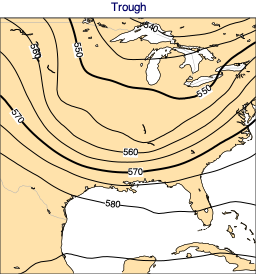

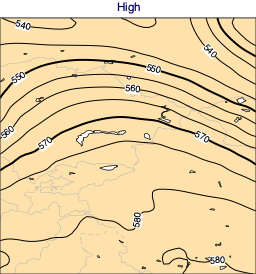

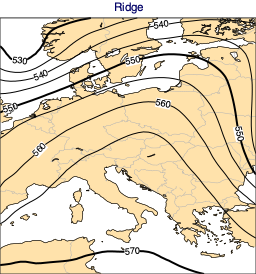

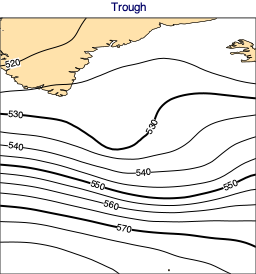

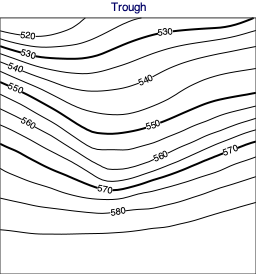

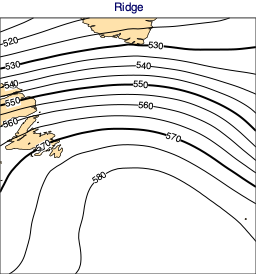

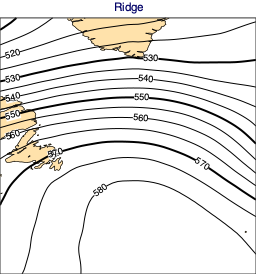

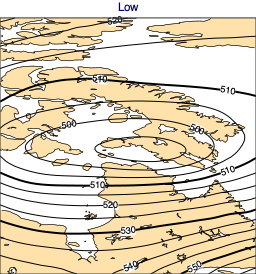

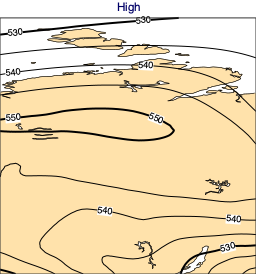

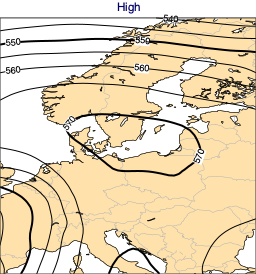

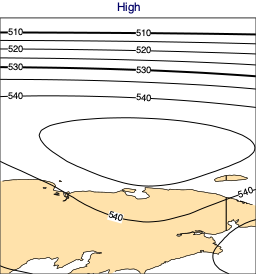

In [31]:
highlow = cml.load_dataset("high-low")
for field, label in highlow.fields():
    cml.plot_map(field, width=256, title=highlow.title(label))

### Get the train and test sets

In [33]:
(x_train, y_train, f_train), (x_test, y_test, f_test)  = highlow.load_data(test_size=0.3, fields=True)

### Build the model

In [35]:
model = Sequential()
model.add(Input(shape=x_train[0].shape))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy' ,metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 441)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                28288     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 260       
Total params: 28,548
Trainable params: 28,548
Non-trainable params: 0
_________________________________________________________________
None


### Train the model

In [38]:
h = model.fit(x_train ,y_train, epochs=100 , verbose=0)

Evaluate the model on the test set

In [39]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.4645 - accuracy: 0.7500


[0.46452033519744873, 0.75]

### Plot the predictions

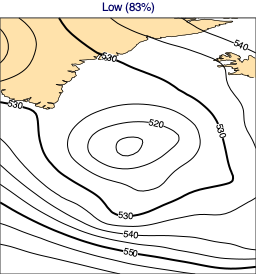

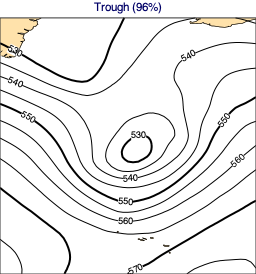

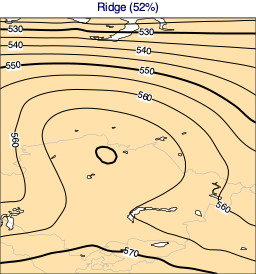

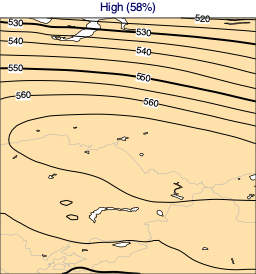

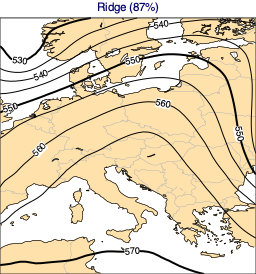

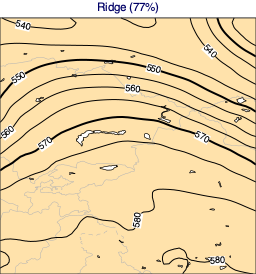

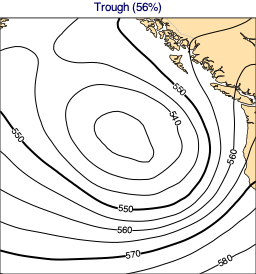

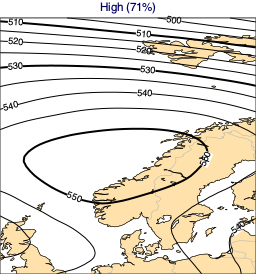

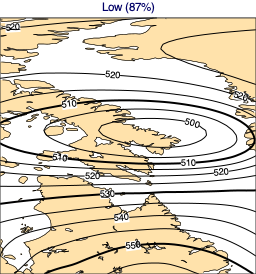

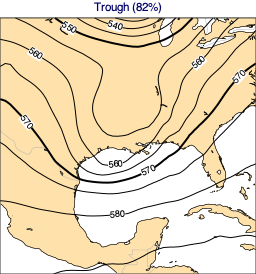

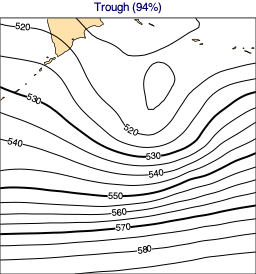

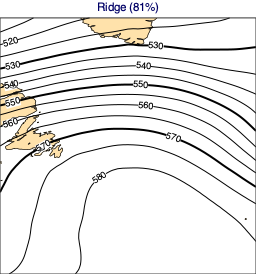

In [40]:
predicted = model.predict(x_test)

for p, f in zip(predicted, f_test):
    cml.plot_map(f, width=256, title=highlow.title(p))